<a href="https://colab.research.google.com/github/yootina/Deep/blob/master/231218_as_11_KMeansClustering_%E1%84%80%E1%85%A9%E1%86%BC%E1%84%8B%E1%85%B2%E1%84%8B%E1%85%AD%E1%86%BC_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 주요 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# https://raw.githubusercontent.com/BigDeepData/2312_as/main/data/example_cluster.csv
df = pd.read_csv('https://raw.githubusercontent.com/BigDeepData/2312_as/main/data/example_cluster.csv')
df

,var_1,var_2
0,3.264413,6.929164
1,0.220814,2.251631
2,-8.786197,-8.333582
3,-0.008547,2.630791
4,4.912903,6.888520
...,...,...
995,4.678232,7.704404
996,5.250715,6.930948
997,-11.818752,-5.609853
998,0.613725,3.809334


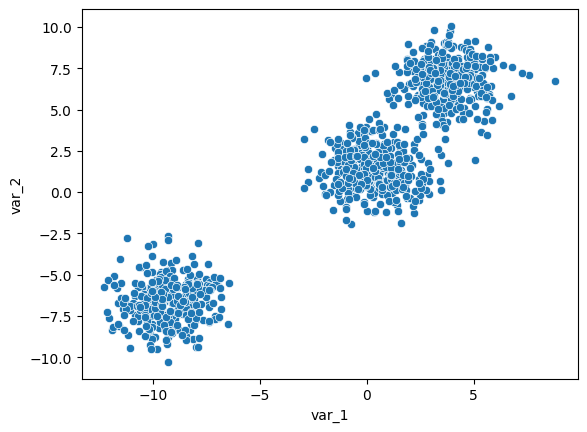

In [ ]:
# 산점도
sns.scatterplot(x='var_1', y='var_2', data=df)
plt.show()

In [ ]:
# K 평균 군집화 (K Means Clustering)
from sklearn.cluster import KMeans # 생각보다 최적의 그룹을 찾는기법이 어렵지 않음. 하이퍼패러미터하는 느낌.
# AffinityPropagation -> 지정할 그룹수를 주지 않아도 최적의 그룹을 찾음.

In [ ]:
# n_clusters : 나눠줄 클러스터(묶음)의 수
kmeans_model = KMeans(n_clusters=3, random_state=27)

In [ ]:
# 지도 -> X, y
# 비지도 -> X
# 검증을 할 필요도 없으니 굳이 데이터 분리 (학습셋(검증셋), 테스트셋)
kmeans_model.fit(df) # 이후에 유사한 X로 predict.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=27)

In [ ]:
# 예측
# 군집화 분석을 통해 분석된 K개의 그룹과 각 데이터가 어느 그룹에 속했는지
# fit_predict (fit하고 바로 예측)
# fit -> transform. fit -> predict
pred = kmeans_model.predict(df)
pred

array([1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0,
       0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2,
       0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1,
       2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1,
       0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 0,
       2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0,
       1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2,
       2, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 2,
       2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2,

In [ ]:
# kmeans_model.fit_predict(df) -> 비지도학습으로 모델 학습 -> 바로 그 훈련된 데이터로 라벨링.

In [ ]:
# label
# KMeans 산출한 그룹들을 label로 주입
df['label'] = pred

<Axes: xlabel='var_1', ylabel='var_2'>

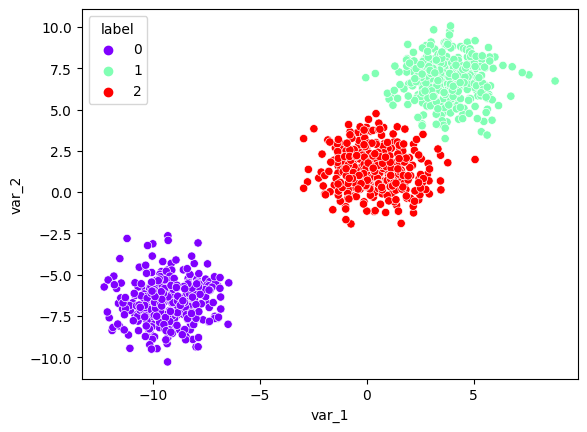

In [ ]:
# 산점도2 - label을 적용한
# sns.scatterplot(
#     x='var_1', y='var_2', data=df,
#     hue='label'
# )
sns.scatterplot(
    x='var_1', y='var_2', data=df,
    hue='label', palette='rainbow' # palette, plt -> cmap.
)

In [ ]:
# 이너셔 (inertia)
# - 각 그룹에서의 중심과 각 그룹에 해당하는 데이터 간의 거리에 대한 합
kmeans_model.inertia_

3090.03323707666

In [ ]:
# k가 엄청 많을 경우
kmeans_model2 = KMeans(n_clusters=500, random_state=27)
kmeans_model2.fit(df)
kmeans_model2.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6.1667156679841995

In [ ]:
df['label2'] = kmeans_model2.predict(df)

In [ ]:
df.label2

0      266
1      152
2      452
3       41
4      397
      ... 
995    339
996     96
997    140
998    187
999    162
Name: label2, Length: 1000, dtype: int32

<Axes: xlabel='var_1', ylabel='var_2'>

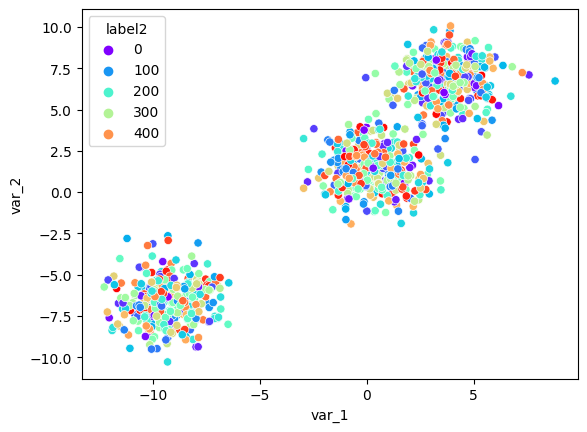

In [ ]:
sns.scatterplot(
    x='var_1', y='var_2', data=df,
    hue='label2', palette='rainbow' # palette, plt -> cmap.
)

In [ ]:
# 적절한 k값 설정 -> 엘보우 기법
# df = df.drop(['label', 'label2'], axis=1)
df = df.drop(columns=['label', 'label2'])
df.columns

Index(['var_1', 'var_2'], dtype='object')

In [ ]:
# inertia 거리의 변화폭이 둔화되는 지점 -> 꺾이는 지점
# fit만 시켜도 inertia_ 생성
distance = []
for k in range(2, 10): # k : 2~9
    k_model = KMeans(n_clusters=k, random_state=27)
    k_model.fit(df) # fit만 시켜도 inertia_ 생성
    distance.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[9741.810795093243,
 3090.03323707666,
 2721.7592526602284,
 2380.645691528157,
 2063.8053046841283,
 1809.4471073212853,
 1597.9442475400306,
 1369.9073198376577]

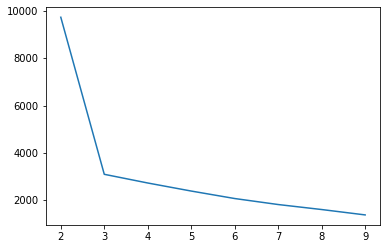

In [ ]:
# 선 차트

# 엘보우 : 직관적이고 편리하긴 하나, 객관적 건 아님 -> 사람이 판단

In [ ]:
for i in range(1, len(distance)):
    # 기울기 -> x 증가 -> y가 증가

    print(f"{i+1}->{i+2}", difference)

2->3 202.16238853316827
3->4 129.79866232476707
4->5 71.88588190549638
5->6 38.13705425295876
6->7 28.357489917546616
7->8 36.74502746928118
8->9 23.098920003290573


In [ ]:
# 이상거래 데이터 -> 단순화
# https://raw.githubusercontent.com/BigDeepData/2312_as/main/data/customer.csv
df = pd.read_csv('https://raw.githubusercontent.com/BigDeepData/2312_as/main/data/customer.csv')

In [ ]:
df

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96
...,...,...,...
240449,4716561796955522,shopping,4.93
240450,30074693890476,shopping,140.12
240451,30404291151692,health_fitness,37.79
240452,4922710831011201,entertainment,17.50


In [ ]:
df.head()

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96


In [ ]:
df.tail()

,cc_num,category,amt
240449,4716561796955522,shopping,4.93
240450,30074693890476,shopping,140.12
240451,30404291151692,health_fitness,37.79
240452,4922710831011201,entertainment,17.50
240453,213112402583773,shopping,25.49


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240454 entries, 0 to 240453
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   cc_num    240454 non-null  int64  
 1   category  240454 non-null  object 
 2   amt       240454 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.5+ MB


In [ ]:
df.describe(include='all')

,cc_num,category,amt
count,2.404540e+05,240454,240454.000000
unique,NaN,11,NaN
top,NaN,shopping,NaN
freq,NaN,40200,NaN
mean,3.365543e+17,NaN,69.758079
std,1.191447e+18,NaN,150.060270
min,6.049559e+10,NaN,1.000000
25%,2.131124e+14,NaN,9.740000
50%,2.720433e+15,NaN,47.530000
75%,4.642255e+15,NaN,82.950000


In [ ]:
# cc_num : credit card -> 카드번호 -> 특정 고객


100

In [ ]:
# category별로 고객들이 얼마나 소비를 하냐


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240454 entries, 0 to 240453
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cc_num                   240454 non-null  int64  
 1   amt                      240454 non-null  float64
 2   category_entertainment   240454 non-null  uint8  
 3   category_food_dining     240454 non-null  uint8  
 4   category_gas_transport   240454 non-null  uint8  
 5   category_grocery         240454 non-null  uint8  
 6   category_health_fitness  240454 non-null  uint8  
 7   category_home            240454 non-null  uint8  
 8   category_kids_pets       240454 non-null  uint8  
 9   category_misc            240454 non-null  uint8  
 10  category_personal_care   240454 non-null  uint8  
 11  category_shopping        240454 non-null  uint8  
 12  category_travel          240454 non-null  uint8  
dtypes: float64(1), int64(1), uint8(11)
memory usage: 6.2 MB


In [ ]:
# iloc -> 정수 인덱스로 행, 열을 가져오겠다 (인덱서)
# : -> 전체, [행, 열] => 전체 행 중에 2번째 이후 (경계 포함) 열들만 표시하겠다


,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
240449,0,0,0,0,0,0,0,0,0,1,0
240450,0,0,0,0,0,0,0,0,0,1,0
240451,0,0,0,0,1,0,0,0,0,0,0
240452,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 특정 카테고리 포함 여부 (1, 0)
for col_name in customer.iloc[:,2:].columns: # 범주들 이름으로 for문 (반복)
    # 트랜잭션, 거래, 행 (데이터에서의 행)
    # print(col_name)
    # 기존에 있는 컬럼(열)에 새로운 값을 연산

    # 특정 범주(카테고리 포함 여부) : customer[col_name]
    # 소비액 : customer['amt']
    # -> 특정 카테고리에 대한 소비액
    # 한 행 -> 거래 => 열 -> 거래가 속한 범주의 열이라면 amt랑 곱해진 소비액 나올 거고,
    # 나머지 소속되지 않은 경우에 -> 0만 있을 것

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0.00,0.0,0.0,0.00,0.00,0.0,0.0,4.97,0.0,0.00,0.0
1,630423337322,107.23,0.00,0.0,0.0,107.23,0.00,0.0,0.0,0.00,0.0,0.00,0.0
2,38859492057661,220.11,220.11,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
3,3534093764340240,45.00,0.00,0.0,45.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
4,375534208663984,41.96,0.00,0.0,0.0,0.00,0.00,0.0,0.0,41.96,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240449,4716561796955522,4.93,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,4.93,0.0
240450,30074693890476,140.12,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,140.12,0.0
240451,30404291151692,37.79,0.00,0.0,0.0,0.00,37.79,0.0,0.0,0.00,0.0,0.00,0.0
240452,4922710831011201,17.50,17.50,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0


In [ ]:
# cc_num 별로 합계를 해주겠다
# 카드번호별로 groupby -> sum()

# cc_num별 총 소비액인 amt
# 각기 category별 cc_num의 소비액인 각자 열
# -> 총 소비 또는 각 범주별 소비를 통해서 '분류', '군집화'가 가능

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,48149.62,3169.74,4043.46,5076.36,7576.58,1631.22,5458.58,4924.97,4889.57,3135.25,8106.36,137.53
571365235126,259784.87,13864.51,9055.51,36525.79,48812.73,13685.60,19342.79,17726.82,32542.61,16672.08,45994.60,5561.83
571465035400,270081.63,16162.98,15448.75,9081.62,41643.82,15244.03,28282.98,13737.95,15880.82,8771.27,59454.96,46372.45
630412733309,41959.52,3212.46,1543.16,5786.98,8416.70,3201.04,2474.68,3648.97,3109.83,2592.17,7586.79,386.74
630423337322,244612.73,12786.75,6905.07,36460.40,43854.26,12136.74,21106.87,16807.24,32400.76,15885.32,44287.02,1982.30
...,...,...,...,...,...,...,...,...,...,...,...,...
4512828414983801773,250072.42,13951.22,9175.56,36490.48,47944.34,12227.52,20009.92,21961.88,31078.34,16686.28,37421.16,3125.72
4599735407877245080,96104.05,6065.69,10049.34,11201.13,16248.52,3013.14,9423.36,10710.95,8514.05,6823.09,12336.91,1717.87
4666314527820883145,73275.54,4612.23,3079.99,1593.63,13434.30,3894.14,6387.17,3114.63,4199.44,3584.61,18135.65,11239.75


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 60495593109 to 4956828990005111019
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   amt                      100 non-null    float64
 1   category_entertainment   100 non-null    float64
 2   category_food_dining     100 non-null    float64
 3   category_gas_transport   100 non-null    float64
 4   category_grocery         100 non-null    float64
 5   category_health_fitness  100 non-null    float64
 6   category_home            100 non-null    float64
 7   category_kids_pets       100 non-null    float64
 8   category_misc            100 non-null    float64
 9   category_personal_care   100 non-null    float64
 10  category_shopping        100 non-null    float64
 11  category_travel          100 non-null    float64
dtypes: float64(12)
memory usage: 10.2 KB


In [ ]:
# 스케일러 -> 표준화 스케일러 (Standard Scaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# 스케일링을 하고 나서 데이터

scaled # numpy array

array([[-1.40232671, -1.13561684, -0.97106905, ..., -1.07025953,
        -1.14142374, -0.61993021],
       [ 1.07940687,  0.41407488,  0.16887956, ...,  1.80734981,
         0.65996745, -0.22258695],
       [ 1.20015148,  0.74712739,  1.62296823, ...,  0.12782479,
         1.29993842,  2.7668909 ],
       ...,
       [-1.10768846, -0.9265974 , -1.1902022 , ..., -0.97473624,
        -0.66458252,  0.19333459],
       [-0.94081475, -0.80789527, -1.09326659, ..., -0.89572163,
        -0.70809415,  0.95453742],
       [ 0.59998262,  0.97669101,  0.61115793, ..., -0.39803373,
        -0.02063061, -0.08679376]])

In [ ]:
scaled_df

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796
...,...,...,...,...,...,...,...,...,...,...,...,...
4512828414983801773,0.965514,0.426639,0.196184,2.086544,0.727562,0.725503,0.940589,1.923480,1.086851,1.810368,0.252344,-0.401038
4599735407877245080,-0.839991,-0.715988,0.394918,-0.398366,-0.721701,-1.263462,-0.576780,-0.190013,-0.818620,-0.286312,-0.940283,-0.504166
4666314527820883145,-1.107688,-0.926597,-1.190202,-1.342390,-0.850378,-1.073294,-1.011957,-1.616986,-1.182972,-0.974736,-0.664583,0.193335


In [ ]:
# 엘보우 기법
distance = []
for k in range(2, 10): # 끝경계 포함 X


In [ ]:
for i in range(1, len(distance)):
    # 기울기 -> x 증가 -> y가 증가
    difference = abs(distance[i] - distance[i-1])
    print(f"{i+1}->{i+2}", difference)

2->3 202.16238853316827
3->4 129.79866232476707
4->5 71.88588190549638
5->6 38.13705425295876
6->7 28.357489917546616
7->8 36.74502746928118
8->9 23.098920003290573


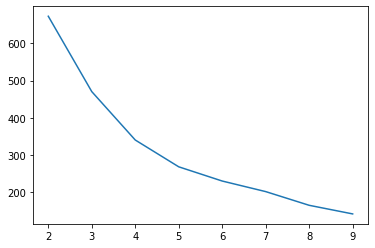

In [ ]:
# 실루엣 계수
# - 이너셔(inertia) : 그룹(클러스터)의 중심으로부터 다른 요소들간의 거리
# - 실루엣 계수 : 클러스터 내부의 평균 거리 + 최근접한 다른 클러스터와의 평균 거리
from sklearn.metrics import silhouette_score

In [ ]:
silhouette = []
for k in range(2, 10):

    # 실제의 데이터 값과, 분류된 라벨을 통해서 클러스터 내부 및 클러스터 간 거리를 계산


[0.3712947437253903,
 0.37507693866618963,
 0.4345029210702488,
 0.3930850775191427,
 0.3837906854316547,
 0.40349881202864785,
 0.365961430759218,
 0.3982540544911355]

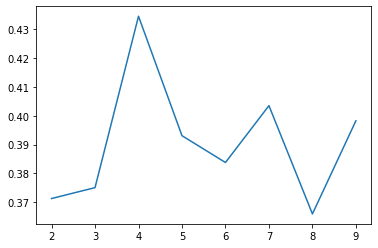

In [ ]:
# 실루엣 계수는 더 클 수록 좋은 분류를 하고 있는 것


,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
cc_num,,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,1
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,2
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512828414983801773,0.965514,0.426639,0.196184,2.086544,0.727562,0.725503,0.940589,1.923480,1.086851,1.810368,0.252344,-0.401038,1
4599735407877245080,-0.839991,-0.715988,0.394918,-0.398366,-0.721701,-1.263462,-0.576780,-0.190013,-0.818620,-0.286312,-0.940283,-0.504166,0
4666314527820883145,-1.107688,-0.926597,-1.190202,-1.342390,-0.850378,-1.073294,-1.011957,-1.616986,-1.182972,-0.974736,-0.664583,0.193335,0


,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
label,,,,,,,,,,,,
0,-0.858082,-0.739555,-0.758078,-0.601061,-0.653905,-0.837854,-0.832432,-0.866100,-0.701383,-0.760106,-0.689347,-0.266604
1,0.311574,0.149105,0.212407,1.025558,0.109070,0.452339,0.369237,0.716395,0.378376,0.470040,0.010316,-0.264410
2,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970
3,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740


label
0    45
1    37
2     8
3    10
Name: amt, dtype: int64

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,count
label,,,,,,,,,,,,,
0,-0.858082,-0.739555,-0.758078,-0.601061,-0.653905,-0.837854,-0.832432,-0.866100,-0.701383,-0.760106,-0.689347,-0.266604,45
1,0.311574,0.149105,0.212407,1.025558,0.109070,0.452339,0.369237,0.716395,0.378376,0.470040,0.010316,-0.264410,37
2,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970,8
3,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740,10
